In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [353]:
data=pd.read_excel("D:\Data science NIELIT\projects\Churn.xlsx")

In [354]:
data.head()   #To find the values present in the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [355]:
data.shape  #to know the row and columns

(7043, 21)

In [356]:
data.dtypes   #data type of the data present

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [357]:
data.isnull().sum()    #to know the empty values present

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [358]:
data['TotalCharges'].isnull().values.any()    

True

In [359]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)         #filling the Nan values present in the column

In [360]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [361]:
data.info()                     #Finding the data type of the columns present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [362]:
data.describe()          #It show the basic mean, count and min max values

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [363]:
columns = data.columns.values.tolist()
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [364]:
data = data.drop(['customerID', 'StreamingTV','StreamingMovies','PaperlessBilling','MultipleLines','PaymentMethod'], axis=1)       #dropping the columns which feels unnecessary to the model   

In [365]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [366]:
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1

data.loc[data.gender=='Female','gender'] = 1 
data.loc[data.gender=='Male','gender'] = 0

data.loc[data.Partner=='No','Partner'] = 0 
data.loc[data.Partner=='Yes','Partner'] = 1

data.loc[data.Dependents=='No','Dependents'] = 0 
data.loc[data.Dependents=='Yes','Dependents'] = 1

data.loc[data.PhoneService=='No','PhoneService'] = 0 
data.loc[data.PhoneService=='Yes','PhoneService'] = 1

data.loc[data.InternetService=='No','InternetService'] = 0 
data.loc[data.InternetService=='DSL','InternetService'] = 1
data.loc[data.InternetService=='Fiber optic','InternetService'] = 1

data.loc[data.OnlineSecurity=='No','OnlineSecurity'] = 0 
data.loc[data.OnlineSecurity=='No internet service','OnlineSecurity'] = 0 
data.loc[data.OnlineSecurity=='Yes','OnlineSecurity'] = 1

data.loc[data.OnlineBackup=='No','OnlineBackup'] = 0 
data.loc[data.OnlineBackup=='No internet service','OnlineBackup'] = 0 
data.loc[data.OnlineBackup=='Yes','OnlineBackup'] = 1

data.loc[data.DeviceProtection=='No','DeviceProtection'] = 0 
data.loc[data.DeviceProtection=='No internet service','DeviceProtection'] = 0 
data.loc[data.DeviceProtection=='Yes','DeviceProtection'] = 1

data.loc[data.TechSupport=='No','TechSupport'] = 0
data.loc[data.TechSupport=='No internet service','TechSupport'] = 0
data.loc[data.TechSupport=='Yes','TechSupport'] = 1

data.loc[data.Contract=='Month-to-month','Contract'] = 0
data.loc[data.Contract=='One year','Contract'] = 1
data.loc[data.Contract=='Two year','Contract'] = 2


data['MonthlyCharges'] = data['MonthlyCharges'].apply(lambda x : np.nan_to_num(x))
data['TotalCharges'] = data['TotalCharges'].apply(lambda x : np.nan_to_num(x))



#As the models cannot evaluate string data it is better to convert the values to numerical data.

In [367]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,1,0,0,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,0,0,0,53.85,108.15,1
3,0,0,0,0,45,0,1,1,0,1,1,1,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,70.70,151.65,1


<AxesSubplot:>

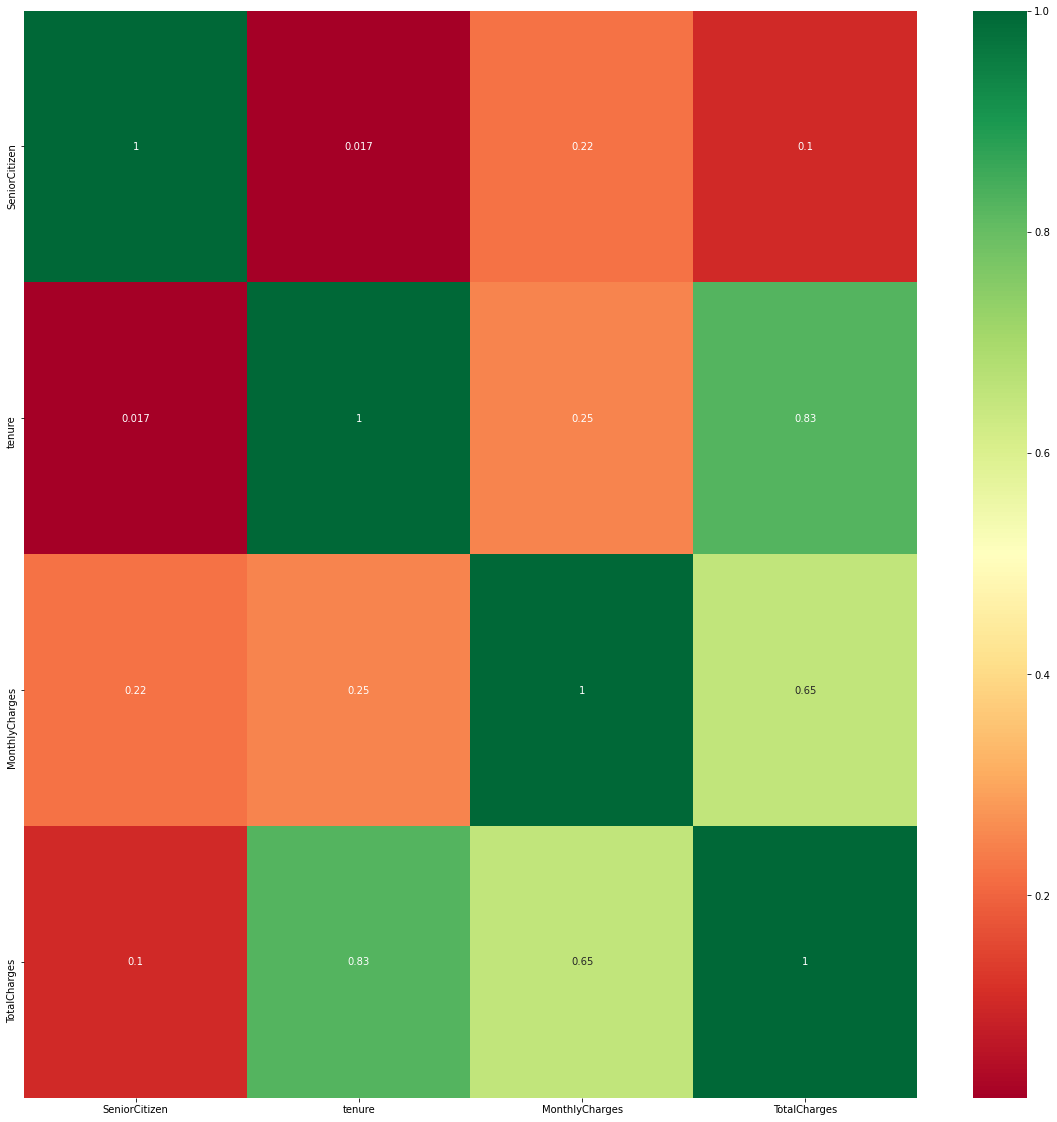

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [369]:
X =  data.drop(['Churn'], axis=1)
y = data['Churn']

In [370]:
y.dtype
y=y.astype('int')

In [371]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#Split the entire dataset for training and testing

In [384]:
X_train.shape        #To train the model with all the columns

(5634, 14)

In [386]:
y_train.shape          #To train the model with the output churn column

(5634,)

In [375]:
X_test.shape          #to test the model with all the columns

(1409, 14)

In [387]:
y_test.shape          #to test the model with the output churn column

(1409,)

In [392]:
from sklearn.ensemble import RandomForestClassifier
rand_fit = RandomForestClassifier()  
rand_fit.fit(X_train, y_train)  
ypred1 = rand_fit.predict(X_test)


#Random forest classifier is chosen. It works as a decision tree and traverses through the data

In [396]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,ypred1 ))  
print(accuracy_score(y_test, ypred1 ))


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.59      0.50      0.54       368

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

0.7799858055358411


In [408]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,ypred1)
pd.crosstab(y_test, ypred1, rownames = ['Actual'], colnames =['Predicted'], margins = True)


#This explains the true positive, true negative, false positive and false negative values

Predicted,0,1,All
Actual,,,
0,916,125,1041
1,185,183,368
All,1101,308,1409


<AxesSubplot:>

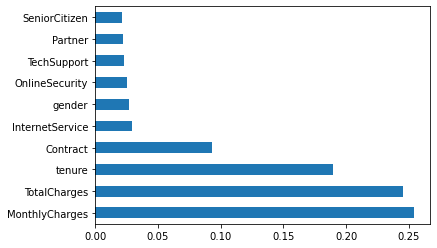

In [409]:
feature = pd.Series(rand_fit.feature_importances_, index=X.columns)
feature.nlargest(10).plot(kind='barh')

In [410]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [411]:
y_pred2 = log_reg.predict(X_test)

In [412]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logistic Regression is {}%".format(accuracy_score(y_pred2,y_test)*100) )

Accuracy for Logistic Regression is 79.347054648687%


In [413]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred2 ))  
print(accuracy_score(y_test, y_pred2 ))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.62      0.54      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

0.7934705464868701


In [414]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
pd.crosstab(y_test, y_pred2, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,921,120,1041
1,171,197,368
All,1092,317,1409


In [415]:
final_mod=rand_fit.fit(X_train,y_train)
yypred=final_mod.predict(X_test)
yypred
output=pd.DataFrame()
output['churnop']=yypred
output.head(20)

,churnop
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [416]:
final_mod2=log_reg.fit(X_train,y_train)
yypred2=final_mod2.predict(X_test)
yypred
output2=pd.DataFrame()
output2['churnop']=yypred2
output2.head(20)

,churnop
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


Churn prediction is the prediction of subscribers who are likely to remove themselves from the company’s service. 

By predicting this condition in prior, we can concentrate the users and grab their attention which in turn will improve the business. 

In this I have studied the dataset and analysed which features would impact the business majorly. I have dropped other columns which felt unnecessary.
I have used random forest classifier and logistic regression to train the model and predict the output.
The key factors that determine the output are tenure and contract. We can find this by plotting a graph for feature_importances
Tenure means the fixed time for the person, it impacts more on how a certain person would choose between staying or leaving from a company. 

Contract is another way to hold a person, this plays a major role as well.
Once they have been implemented we could apply them in the model and compare the changes.
  
